In [1]:
%%bash
mkdir -p logs
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx
${PATH}/DAE_EMT_Slack_Resistor_RXLoad
${PATH}/DAE_EMT_Slack_Resistor_RXLoadElements

[16:05:10.500923 SP_Ph3_Slack_Resistor_RXLoad_Init info] Initialize simulation: SP_Ph3_Slack_Resistor_RXLoad_Init
[16:05:10.503336 SP_Ph3_Slack_Resistor_RXLoad_Init info] Scheduling tasks.
[16:05:10.503809 SP_Ph3_Slack_Resistor_RXLoad_Init info] Scheduling done.
[16:05:10.503858 SP_Ph3_Slack_Resistor_RXLoad_Init info] Opening interfaces.
[16:05:10.503896 SP_Ph3_Slack_Resistor_RXLoad_Init info] Waiting for start synchronization on 0 interfaces
[16:05:10.503927 SP_Ph3_Slack_Resistor_RXLoad_Init info] Synchronized simulation start with remotes
[16:05:10.503949 SP_Ph3_Slack_Resistor_RXLoad_Init info] Start simulation: SP_Ph3_Slack_Resistor_RXLoad_Init
[16:05:10.589469 SP_Ph3_Slack_Resistor_RXLoad_Init info] Simulation finished.
[16:05:10.590397 DAE_EMT_Slack_Resistor_RXLoad_PF_Init info] Initialize simulation: DAE_EMT_Slack_Resistor_RXLoad_PF_Init
[16:05:10.591906 DAE_EMT_Slack_Resistor_RXLoad_PF_Init info] Scheduling tasks.
[16:05:10.592115 DAE_EMT_Slack_Resistor_RXLoad_PF_Init info] Sche

/home/mmo/git/dpsim/Examples/Notebooks/Solver
column number: 9
results length: 1000
real column names: ['i_slack_0', 'i_slack_1', 'i_slack_2', 'v1_0', 'v1_1', 'v1_2', 'v2_0', 'v2_1', 'v2_2']
complex column names: []
column number: 9
results length: 1000
real column names: ['i_slack_0', 'i_slack_1', 'i_slack_2', 'v1_0', 'v1_1', 'v1_2', 'v2_0', 'v2_1', 'v2_2']
complex column names: []
Big difference between voltages of node 1 of RXLoad and RXLoadElements phaseA: 0.0
Big difference between voltages of node 1 of RXLoad and RXLoadElements phaseB: 0.0
Big difference between voltages of node 1 of RXLoad and RXLoadElements phaseC: 0.0
Big difference between voltages of node 2 of RXLoad and RXLoadElements phaseA: -6.69999999445281e-05
Big difference between voltages of node 2 of RXLoad and RXLoadElements phaseB: 0.00016800000048533548
Big difference between voltages of node 2 of RXLoad and RXLoadElements phaseC: -2.3999999484658474e-05
Big difference between currents of RXLoad and RXLoadElement

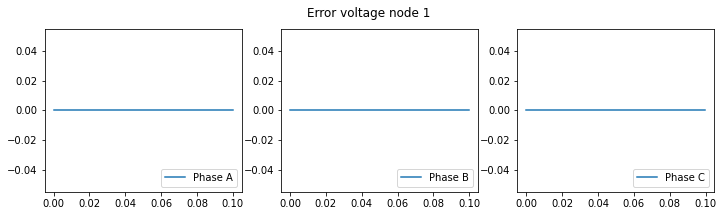

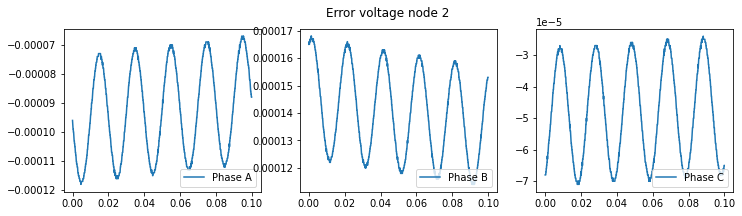

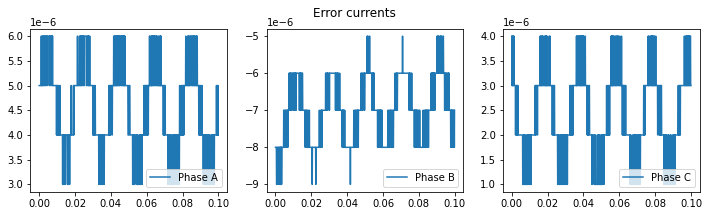

In [2]:
# read Simulink log file

import os
print(os.getcwd())

import matplotlib.pyplot as plt
import villas.dataprocessing.readtools as rt

# read EMT results
log_name_RXLoad   = 'logs/DAE_EMT_Slack_Resistor_RXLoad_PF_Init/DAE_EMT_Slack_Resistor_RXLoad_PF_Init.csv'
log_name_Elements = 'logs/DAE_EMT_Slack_Resistor_RXLoadElements/DAE_EMT_Slack_Resistor_RXLoadElements.csv'
ts_dpsim_emt_RXLOAD = rt.read_timeseries_dpsim(log_name_RXLoad)
ts_dpsim_emt_RXElements = rt.read_timeseries_dpsim(log_name_Elements)

# Comparison

#voltage v1 
width = 12
height = 3
fig = plt.figure(figsize=(width, height))
fig.suptitle('Error voltage node 1', fontsize=12)

#phase A
plt.subplot(1, 3, 1)
v1A = ts_dpsim_emt_RXLOAD['v1_0'].values - ts_dpsim_emt_RXElements['v1_0'].values
plt.plot(ts_dpsim_emt_RXLOAD['v1_0'].time, v1A, label='Phase A')
plt.legend(loc='lower right')
print("Big difference between voltages of node 1 of RXLoad and RXLoadElements phaseA: "+str(max(v1A)))

#voltage v1 phase B
plt.subplot(1, 3, 2)
v1B = ts_dpsim_emt_RXLOAD['v1_1'].values - ts_dpsim_emt_RXElements['v1_1'].values
plt.plot(ts_dpsim_emt_RXLOAD['v1_1'].time, v1B, label='Phase B')
plt.legend(loc='lower right')
print("Big difference between voltages of node 1 of RXLoad and RXLoadElements phaseB: "+str(max(v1B)))

#voltage v1 phase C
v1C = ts_dpsim_emt_RXLOAD['v1_2'].values - ts_dpsim_emt_RXElements['v1_2'].values
plt.subplot(1, 3, 3)
plt.plot(ts_dpsim_emt_RXLOAD['v1_2'].time, v1C, label='Phase C')
plt.legend(loc='lower right')
print("Big difference between voltages of node 1 of RXLoad and RXLoadElements phaseC: "+str(max(v1C)))


#voltage v2 
width = 12
height = 3
fig2 = plt.figure(figsize=(width, height))
fig2.suptitle('Error voltage node 2', fontsize=12)

#phase A
plt.subplot(1, 3, 1)
v2A = ts_dpsim_emt_RXLOAD['v2_0'].values - ts_dpsim_emt_RXElements['v2_0'].values
plt.plot(ts_dpsim_emt_RXLOAD['v2_0'].time, v2A, label='Phase A')
plt.legend(loc='lower right')
print("Big difference between voltages of node 2 of RXLoad and RXLoadElements phaseA: "+str(max(v2A)))

#voltage v2 phase B
plt.subplot(1, 3, 2)
v2B = ts_dpsim_emt_RXLOAD['v2_1'].values - ts_dpsim_emt_RXElements['v2_1'].values
plt.plot(ts_dpsim_emt_RXLOAD['v2_1'].time, v2B, label='Phase B')
plt.legend(loc='lower right')
print("Big difference between voltages of node 2 of RXLoad and RXLoadElements phaseB: "+str(max(v2B)))

#voltage v2 phase C
plt.subplot(1, 3, 3)
v2C = ts_dpsim_emt_RXLOAD['v2_2'].values - ts_dpsim_emt_RXElements['v2_2'].values
plt.plot(ts_dpsim_emt_RXLOAD['v2_2'].time, v2C, label='Phase C')
plt.legend(loc='lower right')
print("Big difference between voltages of node 2 of RXLoad and RXLoadElements phaseC: "+str(max(v2C)))


#currents 
width = 12
height = 3
fig3 = plt.figure(figsize=(width, height))
fig3.suptitle('Error currents', fontsize=12)

#current phase A
plt.subplot(1, 3, 1)
i = ts_dpsim_emt_RXLOAD['i_slack_0'].values - ts_dpsim_emt_RXElements['i_slack_0'].values
plt.plot(ts_dpsim_emt_RXLOAD['i_slack_0'].time, i, label='Phase A')
plt.legend(loc='lower right')
print("Big difference between currents of RXLoad and RXLoadElements phaseA: "+str(max(i)))

#current phase B
plt.subplot(1, 3, 2)
i2 = ts_dpsim_emt_RXLOAD['i_slack_1'].values - ts_dpsim_emt_RXElements['i_slack_1'].values
plt.plot(ts_dpsim_emt_RXLOAD['i_slack_1'].time, i2, label='Phase B')
plt.legend(loc='lower right')
print("Big difference between currents of RXLoad and RXLoadElements phaseB: "+str(max(i2)))

#current phase C
plt.subplot(1, 3, 3)
i3 = ts_dpsim_emt_RXLOAD['i_slack_2'].values - ts_dpsim_emt_RXElements['i_slack_2'].values
plt.plot(ts_dpsim_emt_RXLOAD['i_slack_2'].time, i3, label='Phase C')
plt.legend(loc='lower right')
print("Big difference between currents of RXLoad and RXLoadElements phaseC: "+str(max(i3)))


